In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

In [2]:
print(diabetes.keys())  # 데이터셋의 필드 확인
print(diabetes['data'].shape)  # 특성 행렬 크기
print(diabetes['target'].shape)  # 타겟 크기
print(diabetes['feature_names'])  # 특성 이름 목록

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
df_X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df_y = pd.DataFrame(diabetes['target'], columns=['target'])

df_X.head(), df_y.head()

(        age       sex       bmi        bp        s1        s2        s3   
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
    target
 0   151.0
 1    75.0
 2   141.0
 3   206.0
 4   135.0)

In [4]:
import numpy as np
X = np.array(df_X)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
y = np.array(df_y)
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [6]:
X.shape, y.shape

((442, 10), (442, 1))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


In [8]:
W = np.random.rand(10)
b = np.random.rand()
print(W, b)

[0.32830161 0.25636453 0.62996763 0.75353017 0.65719937 0.06342117
 0.76776225 0.84225125 0.91100023 0.37839539] 0.9588008827365434


In [9]:
def model(X, W, b):
    y_pred = np.zeros(X.shape[0])  # (353,) 크기의 0 벡터
    
    for i in range(10):
        y_pred += X[:, i] * W[i] 
        
    y_pred = y_pred + b  
    return y_pred.reshape(-1, 1)  # 결과를 (353, 1)로 reshape


In [10]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [11]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    
    error = y_pred - y

    dW = 1/N * 2 * X.T.dot(error)
    dW = dW.flatten() 
    db = 2 * (error).mean()
    
    return dW, db

In [12]:
dW, db = gradient(X_train, W, b, y_train)
dW, db

(array([-1.13058658, -0.32609266, -5.09305773, -3.2453389 , -1.26119348,
        -1.31242942,  3.4938386 , -3.22176217, -4.10889577, -3.13593138]),
 -305.78997485113223)

In [13]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [14]:
Learning_rate = 0.001

In [16]:
Learning_rate = 0.01

In [17]:
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)

    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6240.4399
Iteration 20 : Loss 6137.9277
Iteration 30 : Loss 6066.8981
Iteration 40 : Loss 6016.8950
Iteration 50 : Loss 5980.9375
Iteration 60 : Loss 5954.3655
Iteration 70 : Loss 5934.0676
Iteration 80 : Loss 5917.9666
Iteration 90 : Loss 5904.6759
Iteration 100 : Loss 5893.2695
Iteration 110 : Loss 5883.1293
Iteration 120 : Loss 5873.8428
Iteration 130 : Loss 5865.1343
Iteration 140 : Loss 5856.8198
Iteration 150 : Loss 5848.7765
Iteration 160 : Loss 5840.9224
Iteration 170 : Loss 5833.2026
Iteration 180 : Loss 5825.5805
Iteration 190 : Loss 5818.0316
Iteration 200 : Loss 5810.5397
Iteration 210 : Loss 5803.0936
Iteration 220 : Loss 5795.6862
Iteration 230 : Loss 5788.3124
Iteration 240 : Loss 5780.9689
Iteration 250 : Loss 5773.6535
Iteration 260 : Loss 5766.3647
Iteration 270 : Loss 5759.1014
Iteration 280 : Loss 5751.8629
Iteration 290 : Loss 5744.6486
Iteration 300 : Loss 5737.4583
Iteration 310 : Loss 5730.2916
Iteration 320 : Loss 5723.1484
Iteration 330 : L

In [18]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# X_test 데이터도 같은 방식으로 변환해야 합니다.
X_test_normalized = scaler.transform(X_test)

In [19]:
y_train_normalized = scaler.fit_transform(y_train)
y_test_nrmalized = scaler.transform(y_test)

In [20]:
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train_normalized, W, b, y_train_normalized)

    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6945.5432
Iteration 20 : Loss 9060.6681
Iteration 30 : Loss 10613.0175
Iteration 40 : Loss 11611.8122
Iteration 50 : Loss 12232.6012
Iteration 60 : Loss 12622.9399
Iteration 70 : Loss 12879.2599
Iteration 80 : Loss 13059.1859
Iteration 90 : Loss 13195.7989
Iteration 100 : Loss 13307.7224
Iteration 110 : Loss 13405.3415
Iteration 120 : Loss 13494.4243
Iteration 130 : Loss 13578.1742
Iteration 140 : Loss 13658.3760
Iteration 150 : Loss 13736.0319
Iteration 160 : Loss 13811.7128
Iteration 170 : Loss 13885.7518
Iteration 180 : Loss 13958.3507
Iteration 190 : Loss 14029.6385
Iteration 200 : Loss 14099.7038
Iteration 210 : Loss 14168.6124
Iteration 220 : Loss 14236.4168
Iteration 230 : Loss 14303.1622
Iteration 240 : Loss 14368.8886
Iteration 250 : Loss 14433.6331
Iteration 260 : Loss 14497.4306
Iteration 270 : Loss 14560.3141
Iteration 280 : Loss 14622.3154
Iteration 290 : Loss 14683.4647
Iteration 300 : Loss 14743.7913
Iteration 310 : Loss 14803.3235
Iteration 320 : Los

In [43]:
correlation_matrix = df_X.corr()
print(correlation_matrix)

          age       sex       bmi        bp        s1        s2        s3   
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181  \
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

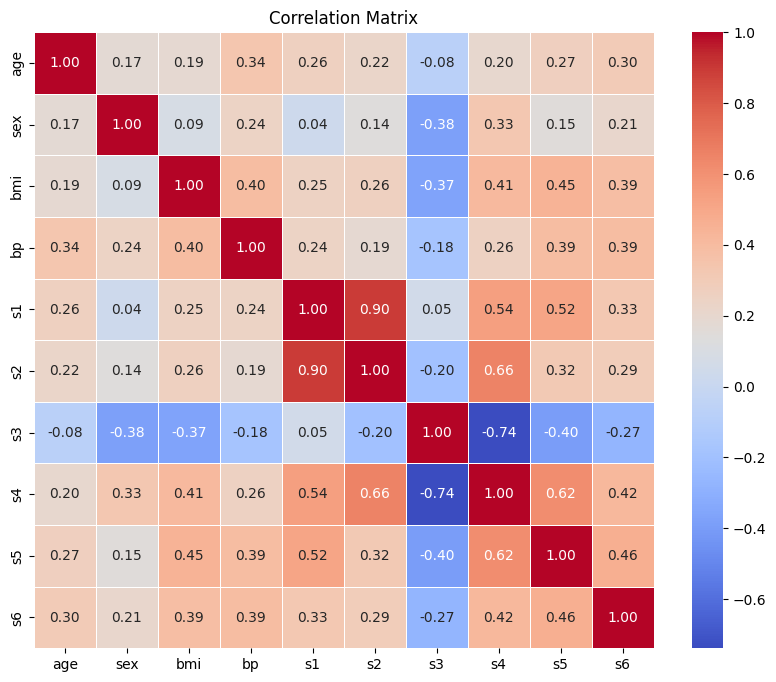

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()